In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Pokaż kod", True: "Chowaj kod"}

def toggle_code(state):
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))

def button_action(value):
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]

state = False
toggle_code(state)
button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")
display(button)

ToggleButton(value=False, description='Pokaż kod')

# Projekt 2: Co słychać w torrentach?
## Grupa: Wdevs $©$ 2021 
### Krzysztof Kadowski

<hr>

## Temat: Statystyki pobrań w zależności od tagów przypisanych do płyt.

## Teza: Liczba tagów ma wpływ na wybór płyt...? 

<hr>

## Przygotowanie danych
<p>Dane znajdują się w dwóch tabelach w bazie danych Sqlite 
<a href="https://www.kaggle.com/nolanbconaway/whatcd-hiphop">https://www.kaggle.com/nolanbconaway/whatcd-hiphop </a>. 
</p><p>Dane zostały zaimportowane, tabele połączono i wyeksportowano do pliku csv.</p>
<p>Dane zawierają kolumny:</p>
<li>id - numer pobrania</li>
<li>groupName - nazwa zespołu torrent</li>
<li>totalSnatched - liczba ściągnięć</li>
<li>artist - artysta</li>
<li>groupYear - rok realizacji albumu</li>
<li>releaseType - nośnik / wydanie</li>
<li>tag - tagi (n-n wiele tagów do jednej płyty)</li>

Data info:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
torrenty = pd.read_csv("torrenty_202106201241.csv") 

In [40]:
torrenty.head()

,id,groupName,totalSnatched,artist,groupYear,releaseType,tag
0,0,superappin&#39;,239,grandmaster flash & the furious five,1979,single,1970s
1,1,superappin&#39;,239,grandmaster flash & the furious five,1979,single,funk
2,2,superappin&#39;,239,grandmaster flash & the furious five,1979,single,disco
3,3,rapper&#39;s delight,480,sugarhill gang,1979,single,1970s
4,4,rapper&#39;s delight,480,sugarhill gang,1979,single,new.york


## Informacje o tagach

Tagi są dowolnymi słowami opisującymi kategorię muzyczną, lata świetności lub miejsca, w którym muzyka powstała. Z racji relacji n-n między tagami a daną płytą istnieje możliwość przyspiania kilku tagów do jednej płyty. Liczba tagów może mieć wpływ na ilość pobrań danej płyty.

In [4]:
tags_all = torrenty[['tag']]
tags = tags_all.drop_duplicates().sort_values(by='tag')
num_of_tags = len(tags)
print("Liczba unikalnych tagów: {0}".format(num_of_tags))

Liczba unikalnych tagów: 3678


Lista unikalnych tagów:

In [5]:
w = widgets.IntSlider(min=0,max=num_of_tags,step=1,description='Tag list')
def value_handler(v):
    print(tags[v:v+10])
    
widgets.interact(value_handler, v=w)

interactive(children=(IntSlider(value=0, description='Tag list', max=3678), Output()), _dom_classes=('widget-i…

<function __main__.value_handler(v)>

## Statystyki dotyczące tagów

In [6]:
torrenty.head()
torrenty["totalSnatched"].describe()

count    161283.000000
mean        269.154883
std        1739.688642
min           0.000000
25%          11.000000
50%          29.000000
75%          93.000000
max       76457.000000
Name: totalSnatched, dtype: float64

In [7]:
torrenty["tag"].describe()

count         161270
unique          3677
top       electronic
freq           12681
Name: tag, dtype: object

In [8]:
torrenty[["tag", "totalSnatched"]]

,tag,totalSnatched
0,1970s,239
1,funk,239
2,disco,239
3,1970s,480
4,new.york,480
...,...,...
161278,instrumental,58
161279,chill,58
161280,pop,19
161281,electronic,26


In [9]:
torrenty[["tag"]].value_counts()

tag                
electronic             12681
2010s                  10039
instrumental            5622
freely.available        5092
experimental            4809
                       ...  
hip.hip.alternative        1
hip.hop.90s                1
hip.hop.ambient            1
hip.hop.bulgarian          1
zydeco                     1
Length: 3677, dtype: int64

In [10]:
tags = pd.DataFrame(torrenty[["tag"]].value_counts() )
tags

,0
tag,
electronic,12681
2010s,10039
instrumental,5622
freely.available,5092
experimental,4809
...,...
hip.hip.alternative,1
hip.hop.90s,1
hip.hop.ambient,1


In [11]:
tags_perc = pd.DataFrame(torrenty[["tag"]].value_counts(normalize=True))
tags_perc

,0
tag,
electronic,0.078632
2010s,0.062250
instrumental,0.034861
freely.available,0.031574
experimental,0.029820
...,...
hip.hip.alternative,0.000006
hip.hop.90s,0.000006
hip.hop.ambient,0.000006


In [35]:
np.histogram(tags)

(array([3648,   15,    6,    4,    2,    0,    0,    1,    0,    1]),
 array([1.0000e+00, 1.2690e+03, 2.5370e+03, 3.8050e+03, 5.0730e+03,
        6.3410e+03, 7.6090e+03, 8.8770e+03, 1.0145e+04, 1.1413e+04,
        1.2681e+04]))

(array([3.663e+03, 1.000e+01, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([1.0000e+00, 2.5370e+03, 5.0730e+03, 7.6090e+03, 1.0145e+04,
        1.2681e+04]),
 <BarContainer object of 5 artists>)

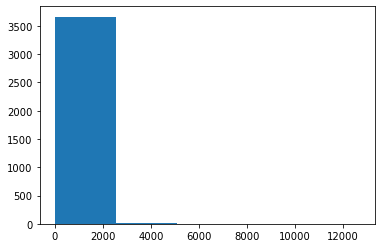

In [34]:
plt.hist(tags, bins=5)

<AxesSubplot:xlabel='tag'>

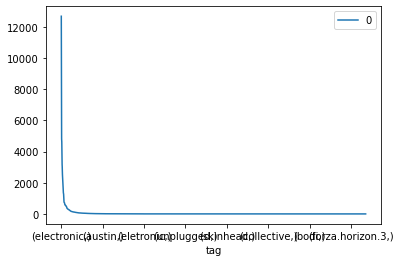

In [39]:
tags.plot()

In [48]:
## Grupowanie po artystach
torrenty.columns

Index(['id', 'groupName', 'totalSnatched', 'artist', 'groupYear',
       'releaseType', 'tag'],
      dtype='object')

In [62]:
torr_grouped_artist = torrenty.groupby(["artist"])["tag"].count()

In [60]:
torr_grouped_artist

artist
!ll.martians             24
!llmind                 260
!llmind & skyzoo       1258
"e"qual                   3
"invictus" mosai         44
                       ... 
회사auto                  280
︻╦╤─ ʊz ─╤╦︻           5389
＼(^o^)／ & tofubeats     216
ｂｅｔａｇａｋｉ                 10
ｏｌｄ ｍａｓｋ                 68
Name: totalSnatched, Length: 26809, dtype: int64

# NLP

In [36]:

tags_all["tag"]

0                1970s
1                 funk
2                disco
3                1970s
4             new.york
              ...     
161278    instrumental
161279           chill
161280             pop
161281      electronic
161282       australia
Name: tag, Length: 161283, dtype: object

In [27]:
tokens = tags_all["tag"]

In [28]:
freq = nltk.FreqDist(tokens)

In [29]:
freq

FreqDist({'electronic': 12681, '2010s': 10039, 'instrumental': 5622, 'freely.available': 5092, 'experimental': 4809, '1990s': 4736, 'beats': 4619, 'pop': 4104, '2000s': 3746, 'rhythm.and.blues': 3546, ...})

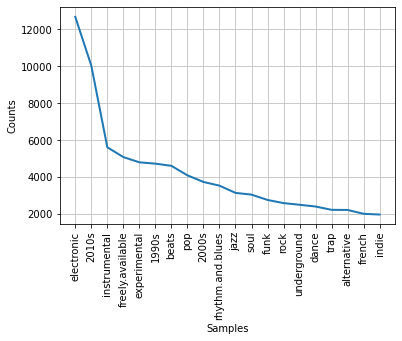

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
freq.plot(20, cumulative=False)